In [1]:
%run -n main.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
SEED_USERNAMES = [
    'alexey_rubtsov',
    'gelmanovrustam',
    'adam.ondra',
    'alexhonnold',
    'chris_sharma',
    'alexandermegos',
    'shaunacoxsey'
]


# urls = [get_insta_user_by_username_url(_) for _ in SEED_USERNAMES]
# fetch_jsons(log_progress(urls, every=1))

In [3]:
users = {load_insta_user_by_username(_) for _ in SEED_USERNAMES}
users_level = {0: users}

In [8]:
# cache = set(list_json_cache())
# urls = [get_insta_related_url(_.id) for _ in users_level[0]]
# fetch_jsons(log_progress(set(urls) - cache, every=1))

In [9]:
users = set()
for user in users_level[0]:
    for related in load_insta_related(user.id):
        users.add(related)
users_level[1] = users - users_level[0]

In [10]:
# cache = set(list_json_cache())
# urls = [get_insta_related_url(_.id) for _ in users_level[1]]
# fetch_jsons(log_progress(set(urls) - cache, every=1))

In [11]:
users = set()
for user in users_level[1]:
    for related in load_insta_related(user.id):
        users.add(related)
users_level[2] = users - users_level[1] - users_level[0]

In [12]:
# cache = set(list_json_cache())
# urls = [get_insta_related_url(_.id) for _ in users_level[2]]
# fetch_jsons(log_progress(set(urls) - cache, every=1))

In [13]:
users = set()
for user in users_level[2]:
    for related in load_insta_related(user.id):
        users.add(related)
users_level[3] = users - users_level[2] - users_level[1] - users_level[0]

In [13]:
# скачать то что не скачалось
# users = set()
# for level in xrange(3):
#     for user in users_level[level]:
#         related = list(load_insta_related(user.id))
#         if not related:
#             users.add(user)

In [14]:
# urls = [get_insta_related_url(_.id) for _ in users if not list(load_insta_related(_.id))]
# fetch_jsons(log_progress(urls, every=1))

In [14]:
users = set()
for level in xrange(3):
    for user in users_level[level]:
        users.add(user)

In [16]:
# # оч хороший получается граф
# graph = make_graph(users)
# save_graph(graph)

In [25]:
user_indegrees = Counter()
for user in users:
    for related in load_insta_related(user.id):
        user_indegrees[related] += 1
        
# for user, degree in user_indegrees.most_common(5000)[-100:]:
#     print degree, '\t', get_insta_url(user.username)

In [18]:
# urls = []
# for user, degree in user_indegrees.most_common(2000)[-1000:]:
#     url = get_insta_user_by_username_url(user.username)
#     urls.append(url)
# cache = set(list_json_cache())
# fetch_jsons(log_progress(set(urls) - cache, every=1))

In [19]:
# скачать то, что не скачалось
# for user, degree in user_indegrees.most_common(2000):
#     if not load_insta_user_by_username(user.username):
#         url = get_insta_user_by_username_url(user.username)
#         fetch_json(url)

In [35]:
%run -n main.py
user_profiles = []
for user, degree in user_indegrees.most_common(1900):
    user_profiles.append(load_insta_user_by_username(user.username))
# dump_users_check(user_profiles, user_indegrees)

In [22]:
# %run -n main.py
# check_usernames = list(load_users_check(all=True))

In [22]:
# cache = set(list_json_cache())
# urls = [get_insta_media_url(_) for _ in check_usernames]
# fetch_jsons(log_progress(set(urls) - cache, every=1))

In [23]:
# cкачать то что не скачалось
# for username in check_usernames:
#     media = list(load_insta_media(username))
#     if not media:
#         url = get_insta_media_url(username)
#         fetch_json(url)

In [36]:
%run -n main.py
media = []
for user in user_profiles:
    media.extend(load_insta_media(user.username))

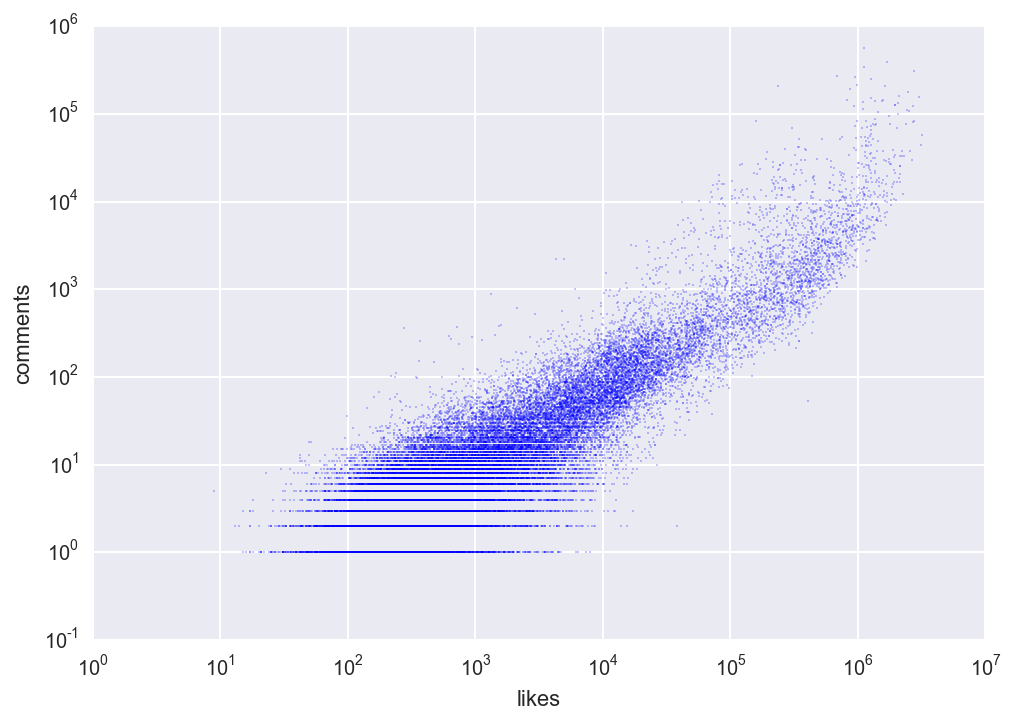

In [209]:
%run -n main.py
show_likes_comments(media)

In [38]:
%run -n main.py
username_users = {_.username: _ for _ in user_profiles}
username_media = defaultdict(list)
for record in media:
    username_media[record.username].append(record)
# for username in check_usernames[700:800]:
#     show_insta_user(username_users[username])
#     show_insta_media(username_media[username][:10])

In [47]:
%run -n main.py
check_usernames = list(load_users_check(all=False))  # 516 actually

In [23]:
# for username in check_usernames[200:400]:
#     show_insta_user(username_users[username])
#     show_insta_media(username_media[username][:10])

In [183]:
# for username in check_usernames:
#     count = username_users[username].followers
#     counts[username] = count
# for username, count in counts.most_common(100):
#     show_insta_user(username_users[username])
#     show_insta_media(username_media[username][:10])

In [57]:
# counts = Counter()
# for username in check_usernames:
#     # count = sum(_.likes for _ in username_media[username])
#     # count /= float(username_users[username].followers)
#     count = username_users[username].followers
#     counts[username] = count
# # for username, count in counts.most_common(100):
for username in check_usernames[:100]:
    show_insta_user(username_users[username])
    show_insta_media(username_media[username][:10])

In [59]:
# selection = [
#     'shaunacoxsey',
#     'alexhonnold',
#     'chris_sharma',
#     'sheneenagins',
#     'alexandermegos',
#     'alex_puccio89',
#     'mccollsean',
#     'sonnietrotter',
#     'nalle_hukkataival',
#     'alexjohnson89',
#     'jakob.schubert'
# ]
# for username in selection:
#     show_insta_user(username_users[username])